<a href="https://colab.research.google.com/github/mjiii25/posco-academy/blob/main/AI-mldl/(%EC%84%A0%EC%83%9D%EB%8B%98)_1_Keras_Basic_%26_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Keras tutorial

- 1.1 Keras Basic(y=3x Regression) - ANN(단층 레이어)
- 1.2 Keras MNIST - ANN(단층 레이어)
- 1.3 Keras MNIST - DNN(다층 레이어)
- 1.4 Keras MNIST - 나만의 모델 만들기

In [1]:
# Import Libraries
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1.1 Keras Basic Y = 3X ANN Regression
- 이번 실습에서는 Keras를 이용하여 1차함수를 예측하는 학습 모델을 만들고, 성능을 평가한다.

### (1) 데이터셋 준비

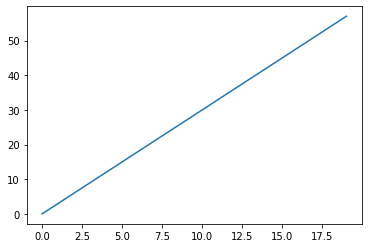

In [2]:
# Training Data
x = np.arange(20) # 0, 1, 2, 3, ...., 19
y = x * 3 # 0, 3, 6, 9, ..., 57
plt.plot(x,y)

# Testing Data 
x_test = np.arange(50,70) # 50, 51, 52, ..., 69
y_test = x_test*3 # 150, 153, 156, ..., 207

# Dimension of input and output
n_in = 1
n_out = 1

### (2) Keras 모델링

- keras.layers : 모델을 구성하기 위한 layer들이 구현되어 있는 모듈

- keras.models : layer들을 묶어 모델을 정의하고 학습, 평가, 예측 등의 기능을 구현한 모듈

In [3]:
from tensorflow.keras import layers, models

Keras에서는 크게 Functional, Sequential 방식으로 모델을 구현

- Sequential : 모델에 필요한 layer들을 순차적으로 더해가는 방식으로 구현
- Function : 모델을 수식처럼 구현 

<Sequential에 사용되는 Layer>

- Dense : Fully Connected Layer (https://keras.io/layers/core/#dense)

### Sequential Modeling

In [4]:
def modeling_sequential(n_in, n_out):
    # Coding Time
    model = models.Sequential()
    model.add(layers.Dense(units =n_out, input_shape=(n_in,)))
    return model

In [5]:
class modeling_sequential_class(models.Sequential):
    def __init__(self, n_in, n_out):
        
        #멤버 변수로 모델에 사용할 변수 선언
        self.n_in = n_in
        self.n_out = n_out
        
        #상속받은 Sequential 클래스 초기화 후 레이어 추가
        super().__init__()
        self.add(layers.Dense(units =n_out, input_shape=(n_in,)))

<Functional에 사용되는 Layer>

- Input : 모델에 입력되는 데이터의 batch size를 제외한 shape을 결정

- Dense : Fully Connected Layer (https://keras.io/layers/core/#dense)

### Functional Modeling

In [6]:
def modeling_functional(n_in, n_out):
    # Coding Time
    x = layers.Input(shape=(n_in,))
    y = layers.Dense(n_out)(x)
    model = models.Model(inputs = x, outputs = y)
    return model

In [7]:
class modeling_functional_class(models.Model):
    def __init__(self, n_in, n_out):
        
        #멤버 변수로 모델에 사용할 변수 및 레이어 선언
        self.n_in = n_in
        self.n_out = n_out
        input = layers.Input(shape=(n_in,))
        output = layers.Dense(n_out)
        
        # layer 연결
        x = input
        y = output(x)

        #상속받은 Model 클래스 초기화
        super().__init__(x, y)

### (2)-2 모델 시각화

model.summary()나 plot_model(model) 활용

In [8]:
model =  modeling_sequential(n_in, n_out)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [9]:
model =  modeling_sequential_class(n_in, n_out)
model.summary()

Model: "modeling_sequential_class"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [10]:
model =  modeling_functional(n_in, n_out)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [11]:
model = modeling_functional_class(n_in, n_out)
model.summary()

Model: "modeling_functional_class"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


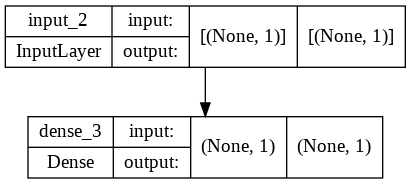

In [12]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

### (3) 모델의 학습과정 설정(model.compile)
- model.compile(loss, optimizer, metrics)
- optimizer(str) : optimizer instance
- loss(str) : loss function
- metrics(str) : list of metrics to be evaluated by the model during training and testing
(https://www.tensorflow.org/api_docs/python/tf/keras/Model)

In [13]:
# Coding Time
model.compile(loss='mse', optimizer='sgd')

### (4) 모델 학습시키기(model.fit)

 - x : Input data
 - y : Label of training input data
 - batch_szie(int) : Number of samples per gradient update
 - steps_per_epoch(int) : Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch
 - epochs(int) : Number of epochs to train the model
 - verbose : 0 = silent, 1 = progress bar, 2 = one line per epoch
 - callbacks : List of callback instances
 - validation_split(float) : Fraction of the training data to be used as validation data
 - validation_data : (x_val, y_val)
 - shuffle(bool) : Whether to shuffle the training data before each epoch
 - history : 학습과정이 담겨있는 데이터 송출
 (https://www.tensorflow.org/api_docs/python/tf/keras/Model)

In [14]:
# Coding Time
history = model.fit(x, y, batch_size=5, epochs=100, validation_split=0.2)

Epoch 1/100
4/4 [==============================] - 3s 84ms/step - loss: 95.2837 - val_loss: 0.2105
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0079 - val_loss: 0.0056
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0033 - val_loss: 0.0184
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0039 - val_loss: 4.8480e-05
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0018 - val_loss: 0.0179
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0031 - val_loss: 3.9612e-04
Epoch 8/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0014 - val_loss: 0.0072
Epoch 9/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0011 - val_loss: 0.0041
Epoch 10/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0017 - val_loss: 0.0201
Epoch 11/100
4/4 [=

### (5) 모델 평가하기
모델 객체의 evaluate 함수로 test 데이터에 대한 모델의 성능을 평가
 - x : Input data
 - y : Label of testing input data
 - batch_size(int) : Number of samples per batch of computation
 - steps(int) : Total number of steps (batches of samples) before declaring the evaluation round finished
 - verbose : 0 = silent, 1 = progress bar, 2 = one line per epoch

In [15]:
# Coding Time
loss= model.evaluate(x_test, y_test, batch_size=20)
print('loss : %.4f'%(loss))

1/1 [==============================] - 0s 66ms/step - loss: 0.0013
loss : 0.0013


## (6) 모델 사용하기
모델 객체의 predict 함수로 input 데이터에 대한 모델의 예측결과를 반환
 - x : Input data
 - batch_size(int) : Number of samples per batch
 - steps(int) : Total number of steps (batches of samples) before declaring the prediction round finished
 - verbose : 0 = silent(recommend), 1 = progress bar, 2 = one line per epoch

In [16]:
new_x = np.arange(100,120)
true_y = new_x*3

pred_y = model.predict(new_x, batch_size=20, verbose = 0)
pred_y = np.reshape(pred_y,(-1,))
for y in zip(new_x, true_y, pred_y):
    print("x: %.2f,  y : %.2f,  y_predict : %.2f"%(y[0], y[1], y[2]))

x: 100.00,  y : 300.00,  y_predict : 299.94
x: 101.00,  y : 303.00,  y_predict : 302.93
x: 102.00,  y : 306.00,  y_predict : 305.93
x: 103.00,  y : 309.00,  y_predict : 308.93
x: 104.00,  y : 312.00,  y_predict : 311.93
x: 105.00,  y : 315.00,  y_predict : 314.93
x: 106.00,  y : 318.00,  y_predict : 317.93
x: 107.00,  y : 321.00,  y_predict : 320.93
x: 108.00,  y : 324.00,  y_predict : 323.93
x: 109.00,  y : 327.00,  y_predict : 326.93
x: 110.00,  y : 330.00,  y_predict : 329.93
x: 111.00,  y : 333.00,  y_predict : 332.93
x: 112.00,  y : 336.00,  y_predict : 335.93
x: 113.00,  y : 339.00,  y_predict : 338.93
x: 114.00,  y : 342.00,  y_predict : 341.93
x: 115.00,  y : 345.00,  y_predict : 344.92
x: 116.00,  y : 348.00,  y_predict : 347.92
x: 117.00,  y : 351.00,  y_predict : 350.92
x: 118.00,  y : 354.00,  y_predict : 353.92
x: 119.00,  y : 357.00,  y_predict : 356.92


## 1.2 MNIST Classification with Linear Classifier
이번 실습에서는 keras로 linear 모델을 생성하고, MNIST dataset을 학습하여 성능을 평가한다.

In [17]:
import tensorflow.keras.utils as utils
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation

import numpy as np
import matplotlib.pyplot as plt

### (1) 데이터셋 다운로드
### Download the MNIST dataset
MNIST dataset은 28x28 사이즈의 이미지들로 0~9까지의 숫자 10개의 손글씨 이미지로 이루어져있다.

60,000장이 training에 사용되고 10,000장이 test에 사용된다.

In [18]:
# Coding Time
(X_train, Y_train),(X_test, Y_test) = datasets.mnist.load_data()
print(X_train.shape, Y_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


label :  5


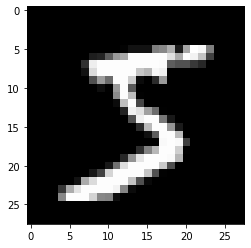

In [19]:
print('label : ',Y_train[0])
plt.imshow(X_train[0], cmap='gray')

In [20]:
# Coding Time
# Flatten and Normalization
X_train_flat = X_train.reshape(60000, 28*28).astype('float32')/255.0
X_test_flat = X_test.reshape(10000, 28*28).astype('float32')/255.0

# One-hot Encoding
Y_train_onehot = utils.to_categorical(Y_train)
Y_test_onehot = utils.to_categorical(Y_test)

print(Y_train_onehot)
print(X_train_flat.shape, Y_train_onehot.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(60000, 784) (60000, 10)


### (2) Keras 모델링

<사용되는 Layer>

- Input : 모델에 입력되는 데이터의 batch size를 제외한 shape을 결정(https://keras.io/layers/core/#input)

- Dense : Fully Connected Layer(https://keras.io/layers/core/#dense)

- Activation : Activation Function을 정의, 문자열로 입력(https://keras.io/layers/core/#activation)

In [21]:
n_in = 28*28   #784
n_out = np.shape(Y_test_onehot)[1] # 10

### Sequential Modeling

In [25]:
def linear_model_seq(n_in, n_out):
    # Coding Time
    model = Sequential()
    model.add(Dense(units =n_out, input_shape=(n_in,), activation='softmax'))
    return model

### Functional Modeling

In [26]:
def linear_model_func(n_in, n_out):
    # Coding Time
    x = Input(shape=(n_in,))
    h = Dense(n_out)(x)
    y = Activation('softmax')(h)
    model = Model(inputs = x, outputs = y)
    return model

In [27]:
model = linear_model_func(n_in, n_out)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


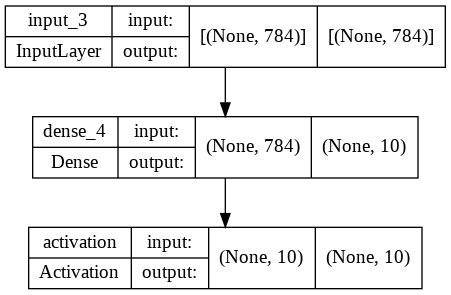

In [28]:
plot_model(model, show_shapes=True)

## (3) 모델의 학습과정 설정
accuracy를 측정할 수 있는 문제라면 metric에 accuracy를 설정 (https://keras.io/models/model/)

In [29]:
# Coding Time
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd',
              metrics=['accuracy'])

## (4) 모델 학습시키기

In [30]:
# Coding Time
history = model.fit(X_train_flat, Y_train_onehot, batch_size=128, epochs=20, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 1.3722 - accuracy: 0.6642 - val_loss: 0.8967 - val_accuracy: 0.8200
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.7972 - accuracy: 0.8228 - val_loss: 0.6605 - val_accuracy: 0.8558
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.6470 - accuracy: 0.8471 - val_loss: 0.5644 - val_accuracy: 0.8665
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.5737 - accuracy: 0.8600 - val_loss: 0.5109 - val_accuracy: 0.8761
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.5291 - accuracy: 0.8678 - val_loss: 0.4764 - val_accuracy: 0.8833
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.4984 - accuracy: 0.8726 - val_loss: 0.4518 - val_accuracy: 0.8866
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.4757 - accuracy: 0.8770 - val_loss: 0.4337 - val_accuracy: 0.8896
Epoch 

## (5) 모델 평가하기

In [31]:
# Coding Time
loss_and_accuracy = model.evaluate(X_test_flat, Y_test_onehot, batch_size=128)
print('loss : %.4f, accruracy : %.4f'%(loss_and_accuracy[0],loss_and_accuracy[1]))

79/79 [==============================] - 0s 2ms/step - loss: 0.3489 - accuracy: 0.9075
loss : 0.3489, accruracy : 0.9075


## (6) 모델 사용하기

real_label : 6, predict_label : 6


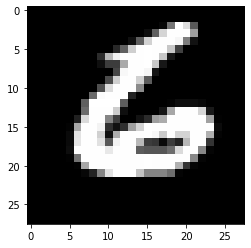

In [32]:
# Coding Time
test_data = X_test[-1].reshape(1,28*28)
pred_y = model.predict(test_data)
pred_y = pred_y.argmax()

print('real_label : {}, predict_label : {}'.format(Y_test[-1], pred_y))
plt.imshow(X_test[-1], cmap='gray')

# 1.3 MNIST Classification with DNN (To Do)

모델의 설명을 보고 DNN 코드를 만들어보자

## (2) Keras 모델링

![image.png](attachment:image.png)

<맨 마지막 activation은 softmax로 하고 이외의 activation은 relu를 사용>

In [33]:
def DNN_seq(n_in, n_out):
    model = Sequential()
    model.add(Dense(units = 256, input_shape=(n_in,), activation='relu'))
    model.add(Dense(units = 128, input_shape=(256,), activation='relu'))
    model.add(Dense(units = 64, input_shape=(128,), activation='relu'))
    model.add(Dense(units = 32, input_shape=(64,), activation='relu'))
    model.add(Dense(units = n_out, input_shape=(32,), activation='softmax'))
    return model

def DNN_func(n_in, n_out):
    x = Input(shape=(n_in,))
    x = Dense(256)(x)
    x = Activation('relu')(x)
    x = Dense(128)(x)
    x = Activation('relu')(x)
    x = Dense(64)(x)
    x = Activation('relu')(x)
    x = Dense(32)(x)
    x = Activation('relu')(x)
    x = Dense(n_out)(x)
    y = Activation('softmax')(x)
    model = Model(inputs = x, outputs = y)
    return model

model = DNN_seq(n_in, n_out)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               200960    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________


## (3) 모델의 학습과정 설정
<optimizer를 adam으로 설정>

In [34]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

## (4) 모델 학습시키기
<batch size를 256, epoch을 30, train 데이터 중 30%를 validation 데이터로 사용, verbose 모드는 2>

In [35]:
history = model.fit(X_train_flat, Y_train_onehot, batch_size=256, epochs=30, validation_split=0.3, verbose =2)

Epoch 1/30
165/165 - 2s - loss: 0.4795 - accuracy: 0.8609 - val_loss: 0.2198 - val_accuracy: 0.9325 - 2s/epoch - 9ms/step
Epoch 2/30
165/165 - 1s - loss: 0.1519 - accuracy: 0.9543 - val_loss: 0.1434 - val_accuracy: 0.9579 - 801ms/epoch - 5ms/step
Epoch 3/30
165/165 - 1s - loss: 0.1006 - accuracy: 0.9705 - val_loss: 0.1193 - val_accuracy: 0.9639 - 809ms/epoch - 5ms/step
Epoch 4/30
165/165 - 1s - loss: 0.0787 - accuracy: 0.9758 - val_loss: 0.1149 - val_accuracy: 0.9670 - 661ms/epoch - 4ms/step
Epoch 5/30
165/165 - 1s - loss: 0.0601 - accuracy: 0.9812 - val_loss: 0.1215 - val_accuracy: 0.9637 - 794ms/epoch - 5ms/step
Epoch 6/30
165/165 - 1s - loss: 0.0471 - accuracy: 0.9852 - val_loss: 0.1011 - val_accuracy: 0.9715 - 680ms/epoch - 4ms/step
Epoch 7/30
165/165 - 1s - loss: 0.0430 - accuracy: 0.9867 - val_loss: 0.1015 - val_accuracy: 0.9721 - 805ms/epoch - 5ms/step
Epoch 8/30
165/165 - 1s - loss: 0.0284 - accuracy: 0.9918 - val_loss: 0.0955 - val_accuracy: 0.9744 - 663ms/epoch - 4ms/step
Epo

## (5) 모델 평가하기

In [36]:
loss_and_accuracy = model.evaluate(X_test_flat, Y_test_onehot, batch_size=128)
print('loss : %.4f, accruracy : %.4f'%(loss_and_accuracy[0],loss_and_accuracy[1]))

79/79 [==============================] - 0s 3ms/step - loss: 0.1322 - accuracy: 0.9751
loss : 0.1322, accruracy : 0.9751


## (6) 모델 사용하기

real_label : 7, predict_label : 7


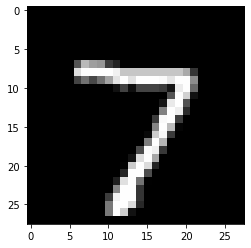

real_label : 2, predict_label : 2


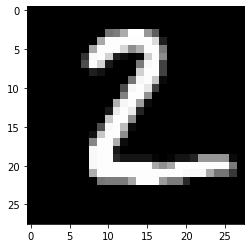

real_label : 1, predict_label : 1


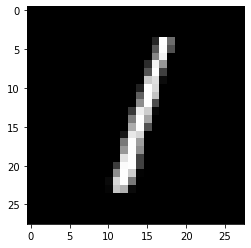

real_label : 0, predict_label : 0


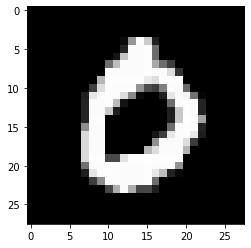

real_label : 4, predict_label : 4


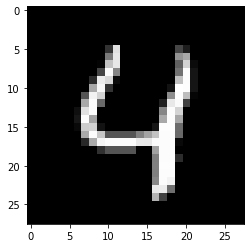

In [37]:
for i in range(5):
    test_data = X_test[i].reshape(1,28*28) 
    pred_y = model.predict(test_data, verbose=0)
    pred_y = pred_y.argmax()
    
    print('real_label : {}, predict_label : {}'.format(Y_test[i], pred_y))
    plt.imshow(X_test[i], cmap='gray')
    plt.show()

## (7) 모델 저장하고 불러오기

저장하기 : model 객체의 내부 함수인 save() .h5 형식으로 저장할 수 있음 [1.모델의 구조, 2.학습된 파라미터, 3.complie() 설정]

In [38]:
# Coding Time
model.save('latest_model.h5')

불러오기 : load_model 함수로 .h5 파일에서 모델을 불러올 수 있음

In [39]:
# Coding Time
from tensorflow.keras.models import load_model
model = load_model('latest_model.h5')
model.fit(X_train_flat, Y_train_onehot, batch_size=256, epochs=3, validation_split=0.3, verbose=2)

Epoch 1/3
165/165 - 1s - loss: 0.0057 - accuracy: 0.9982 - val_loss: 0.1368 - val_accuracy: 0.9749 - 1s/epoch - 7ms/step
Epoch 2/3
165/165 - 1s - loss: 0.0068 - accuracy: 0.9979 - val_loss: 0.1484 - val_accuracy: 0.9753 - 657ms/epoch - 4ms/step
Epoch 3/3
165/165 - 1s - loss: 0.0042 - accuracy: 0.9988 - val_loss: 0.1450 - val_accuracy: 0.9749 - 786ms/epoch - 5ms/step


# ======================================================

# 1.4 Keras MNIST - 모델의 성능을 직접 높혀보자
 - DNN의 구조를 바꾸어 나만의 모델을 만들어보자
 - 목표 정확도: 평가 셋에 대해 98.5% 만들기
 - 바꿀 수 있는 하이퍼 파라미터: Learning Rate, Batch size, Epochs, Optimizer, Activation Function, 모델 레이어 구조 등

## (2) Keras 모델링

## (3) 모델의 학습과정 설정

## (4) 모델 학습시키기

## (5) 모델 평가하기